# Volume Weighted Average vs Simple Moving Average

We are developing a simple model to test if the volume weighted average price (VWAP) is a better indicator of future stock price than a simple moving average price (SMAP). Our hypothesis is that it is, since the VWAP contains more information (i.e. the volume of stocks traded) than the SMAP. Before developing the model, we first give some definitions.

For our purposes, we define the VWAP of stock $A$ as
$$\mathrm{VWAP}_{A}(d) = \frac{\sum_{t=-d}^{0} p_{A}(t)\times V_{A}(t)}{\sum_{t=-d}^{0} V_{A}(t)}$$
Here $p_{A}(d)$ and $V_{A}(d)$ are the closing price of stock $A$ and the volume of stock $A$ (number of shares) , respectively, traded $d$ market days ago. The variable $d$ thus serves as the anchoring point for the volume weighted average.

The SMAP of stock $A$ is defined as
$$\mathrm{SMAP}_{A}(d) = \frac{1}{d+1}\sum_{t=-d}^{0} p_{A}(t)$$
where $d$ is again the lookback period.

To test the model, we will analyze the stocks that constitute the MMI. Our data came from [kaggle](https://www.kaggle.com/borismarjanovic/price-volume-data-for-all-us-stocks-etfs).

### Reading in historical data
We will start by reading in the historical data for stocks in the NYSE ARCA Major Market Index

In [1]:
# Lets first import some useful libraries for data analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates  as dates

# Create a dictionary of stock ticker symbols
ARCAMMI_Stocks={'AmericanExpress':'axp',
                'Boeing':'ba',
                'Chevron':'cvx',
                'DowDupont':'dwdp',
                'Disney':'dis',
                'GeneralElectric':'ge',
                'HewlettPackard':'hpq',
                'IBM':'ibm',
                'JohnsonAndJohnson':'jnj',
                'JPMorgan':'jpm',
                'CocaCola':'ko',
                'McDonalds':'mcd',
                '3M':'mmm',
                'Merck':'mrk',
                'Microsoft':'msft',
                'ProcterAndGamble':'pg',
                'WellsFargo':'wfc',
                'Walmart':'wmt',
                'ExxonMobil':'xom'}

# Read in the historical data
historical_data = {}
for key, ticker in ARCAMMI_Stocks.iteritems():
    historical_data[key] = pd.read_csv('MMI_DATA/'+ticker+'.us.txt',index_col=0)

We have access to the following data:
	Open
	High
	Low
	Close
	Volume
	OpenInt


Historical Closing Price for Disney Stock:


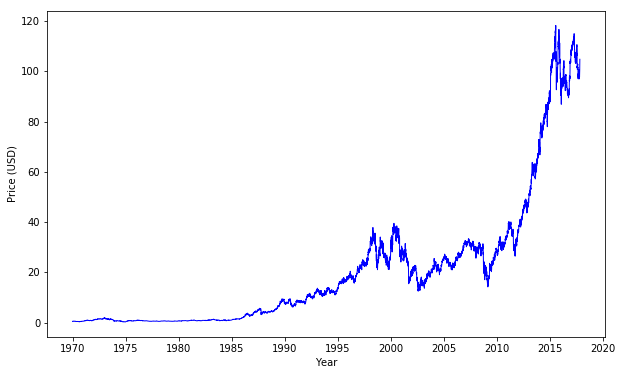

In [2]:
# Lets see what other data we have available to us
print 'We have access to the following data:'
for col in historical_data['Disney'].columns.values:
    print '\t',col


# Lets go ahead and take a look at Disney's historical closing price
print '\n\nHistorical Closing Price for Disney Stock:'
fig, ax = plt.subplots(1,1,figsize=(10,6))
ax.plot_date(historical_data['Disney'].index.values, historical_data['Disney']['Close'],
             color='blue',linewidth=1,marker='',linestyle='-')

#print dates.YearLocator()
ax.xaxis.set_major_locator(dates.YearLocator(base=5))
ax.set_xlabel('Year')
ax.set_ylabel('Price (USD)')
plt.show()
plt.close()


## VWAP and SMAP Functions

Now that we have got the stock data in, lets write some functions to calculate the VWAP and SMAP

In [3]:
def get_vwap(price,volume,d):
    """Return the VWAP anchored d days back"""
    vwap = np.zeros(len(price))
    for i in range(d,len(price)):
        lb = i - d #lower bound
        ub = i + 1 #upper bound
        vwap[i] = np.multiply(price[lb:ub],volume[lb:ub]).sum()
        vwap[i] /= np.sum(1.*volume[lb:ub])
    return vwap

def get_smap(price,d):
    """Return the SMAP anchored d days back"""
    smap = np.zeros(len(price))
    for i in range(d,len(price)):
        lb = i - d #lower bound
        ub = i + 1 #upper bound
        smap[i] = np.sum(price[lb:ub])/(d+1.)
    return smap

## Generate VWAP and SMAP Data
Now that we have functions to calculate VWAP and SMAP, lets go ahead and generate the data using an anchor of 15 days and the stock closing price.

In [4]:
lookback = 15
for company in historical_data:
    historical_data[company]['VWAP'] = get_vwap(historical_data[company]['Close'],historical_data[company]['Volume'],lookback)
    historical_data[company]['SMAP'] = get_smap(historical_data[company]['Close'],lookback)

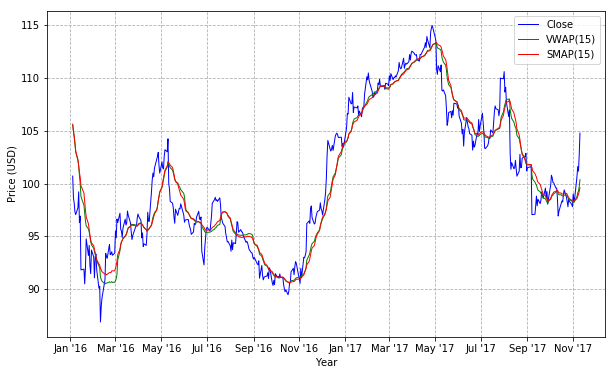

In [51]:
# Lets go ahead and take a look at the disney data from 2016 on
start = '2016-01-01'
fig, ax2 = plt.subplots(1,1,figsize=(10,6))

ax2.plot_date(historical_data['Disney'][start:].index.values, historical_data['Disney'][start::]['Close'],
             color='blue',linewidth=1,marker='',linestyle='-',label='Close')
ax2.plot_date(historical_data['Disney'][start:].index.values, historical_data['Disney'][start::]['VWAP'],
             color='green',linewidth=1,marker='',linestyle='-',label='VWAP('+str(lookback)+')')
ax2.plot_date(historical_data['Disney'][start:].index.values, historical_data['Disney'][start::]['SMAP'],
             color='red',linewidth=1,marker='',linestyle='-',label='SMAP('+str(lookback)+')')

ax2.xaxis.set_major_locator(dates.MonthLocator(interval=2))
ax2.xaxis.set_major_formatter(dates.DateFormatter("%b '%y"))
ax2.set_xlabel('Year')
ax2.set_ylabel('Price (USD)')
ax2.legend()
ax2.grid(linestyle='dashed')
plt.show()
plt.close()